In [2]:
import pandas as pd
df =  pd.read_csv('./ECA_blended_custom/TG_STAID002759.txt',header=14, index_col=1, parse_dates=True)

# Remove data before missing values

In [3]:
df: pd.DataFrame = df[df.index.year > 1945]
df 

,SOUID,TG,Q_TG
DATE,,,
1946-01-01,127488,-34,0
1946-01-02,127488,-30,0
1946-01-03,127488,-28,0
1946-01-04,127488,-27,0
1946-01-05,127488,14,0
...,...,...,...
2022-09-26,111448,136,0
2022-09-27,111448,112,0
2022-09-28,111448,94,0


In [4]:
from format import format_data_frame

df = format_data_frame(df)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28032 entries, 1946-01-01 to 2022-09-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SOUID   28032 non-null  int64  
 1   temp_c  28032 non-null  float64
 2   Q_TG    28032 non-null  int64  
 3   month   28032 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 1.1 MB


In [6]:
df.describe()

,SOUID,temp_c,Q_TG,month
count,28032.000000,28032.000000,28032.000000,28032.000000
mean,111873.966895,9.881111,0.000036,6.508276
std,2605.575399,7.928787,0.005973,3.444521
min,111448.000000,-18.500000,0.000000,1.000000
25%,111448.000000,3.800000,0.000000,4.000000
50%,111448.000000,10.000000,0.000000,7.000000
75%,111448.000000,16.200000,0.000000,9.000000
max,128124.000000,30.500000,1.000000,12.000000


# Model the trend

In [7]:
# !pip install statsmodels

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
sd = seasonal_decompose(df['temp_c'], model='additive', period=365) # Period in days


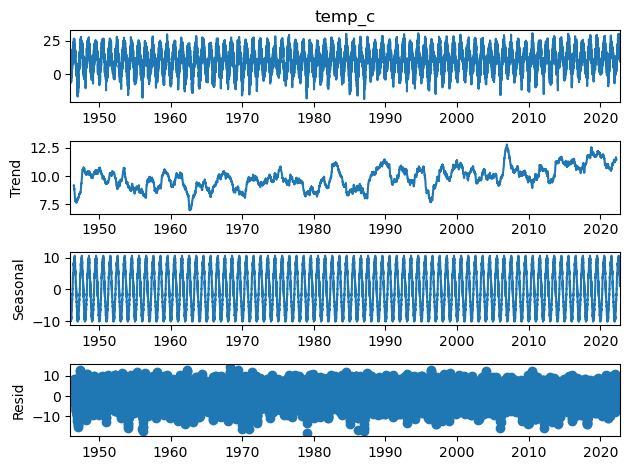

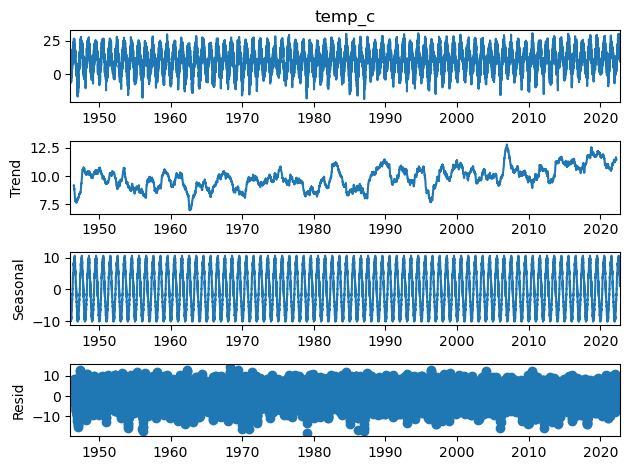

In [9]:
sd.plot()

<AxesSubplot:xlabel='DATE'>

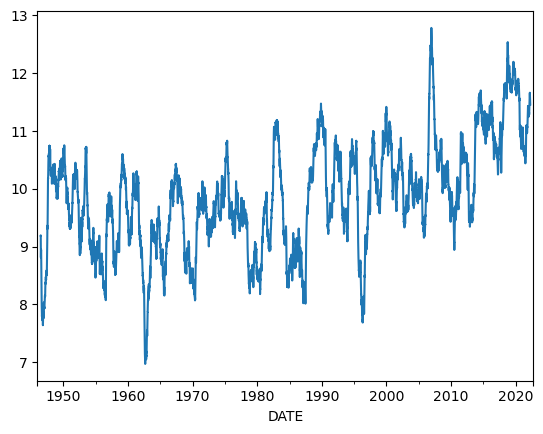

In [10]:
sd.trend.plot()

<AxesSubplot:xlabel='DATE'>

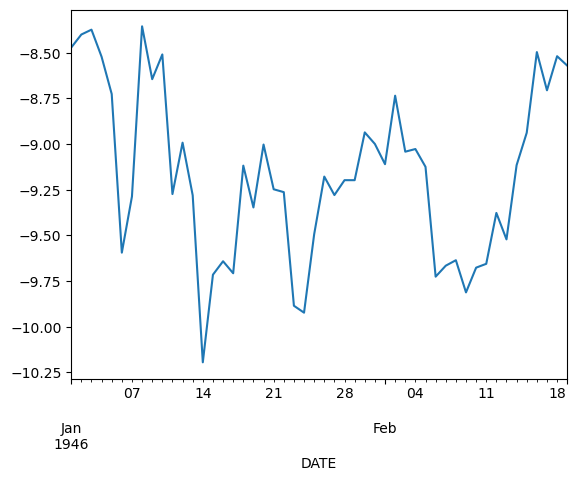

In [11]:
# Sample 50
sd.seasonal[:50].plot()

<AxesSubplot:xlabel='DATE'>

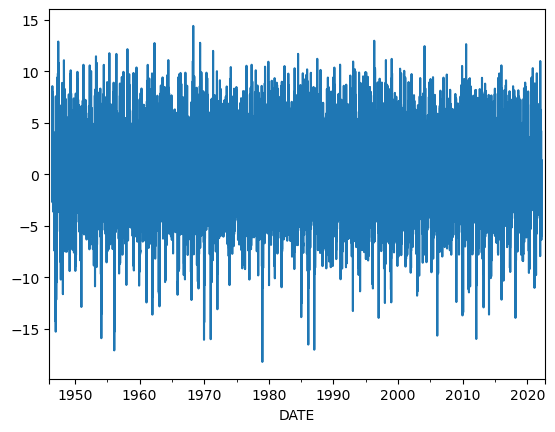

In [14]:
# Sample 50

sd.resid.plot()

In [15]:
sd.resid.to_csv('./artifacts/temp_c_remainder.csv')